<html>
<body>
<h1 style="background-color: #bfafb2;
            display:fill;
            border-radius:15px;
            padding: 20px;
            text-align:center;
            letter-spacing:0.5px">
    <br><font size="+3.5">
    <font color=#000000><b>  </b></font>
   </font>
    <br><font size="+3.5">
    <font color=#000000><b>ML Final Project: California Independent Medical Reviews</b></font>
   </font>
    <br><font size="+1">
    <font color=#000000><b>Leigherin Hurd</font> <br>
    <font color=#000000><b>  </b> 10/27/2024 </font>
   </font>
    </center>
</h1>
</body>
</html>

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 1: Import Packages and Load Dataset</b></font>
    </font>  <br>
</h2>
</html>

### Import Packages

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier, plot_importance


### Load California Independent Medical Review Dataset

In [2]:
# Load California Independent Medical Review Dataset
imr = pd.read_csv('Independent_Medical_Reviews.csv')

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 2: Data Source Overview</b></font>
    </font>  <br>
</h2>
</html>

#### Description of Dataset

The dataset for this project can be found at: https://www.kaggle.com/datasets/prasad22/ca-independent-medical-review/data

Date Range: 2001-2016

This data set was tagged as a Natural Language Processing (NLP) dataset. 

This dataset consists of the following variables:

Categorical Features:
* Reference ID:	Unique identifier for the case
* Report Year: Year the case was reported
* Diagnosis Category: The main diagnosis category
* Diagnosis Sub Category: The secondary diagnosis category
* Treatment Category: The main treatment category
* Treatment Sub Category: The secondary treatment category
* Type: Indicates the type of case (Experimental/Investigational, Urgent Care, Medical Necessity)
* Age Range: The age of the patient
* Patient Gender: The gender of the patient
* Findings: A summary of case findings

Target Variable:
* Determination: Indicates if the determination was upheld (denial of services) or overturned (approval of services)

    
##### Background

This data is from the California Department of Managed Health Care (DMHC). It contains all decisions from Independent Medical Reviews (IMR) administered by the DMHC since January 1, 2001. An IMR is an independent review of a denied, delayed, or modified health care service that the health plan has determined to be not medically necessary, experimental/investigational or non-emergent/urgent. If the IMR is decided in an enrollee's favor, the health plan must authorize the service or treatment requested.

#### Project Objective

Create classification models that predict the determination (outcome), of Independent Medical Reviews on insurance claims. 

#### Questions Related to the Dataset

##### Question 1:
* What are the most common cases brought to independent medical reviewers?
##### Question 2: 
* How has the determination outcome changed since 2001?
##### Question 3:
* Are there any noticable shifts in the treatments that are presented for review?
##### Question 4:
* How is model performance affected by various changes in the dataset?
##### Question 5:
* How is model performance influenced by adjustments to hyperparameters?

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 3: Exploratory Data Analysis</b></font>
    </font>  <br>
</h2>
</html>

### Data Exploration, Cleaning, and Visualizations

#### Exploration #1: First Look at Dataset and Initial Cleaning

In [3]:
# Determine column names and preview data
imr.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [4]:
# Determine size of dataset
imr.shape

(19245, 11)

In [5]:
# Determine unique counts of data in each column of the dataset
unique_counts = imr.nunique()
print(unique_counts)

Reference ID              19245
Report Year                  16
Diagnosis Category           29
Diagnosis Sub Category      278
Treatment Category           31
Treatment Sub Category      283
Determination                 2
Type                          3
Age Range                     7
Patient Gender                2
Findings                  19198
dtype: int64


In [6]:
# List unique values for each column, and exclude columns with unique value counts that are too high (ie. triple digits or more).
exclude_columns = ['Reference ID', 'Diagnosis Sub Category', 'Treatment Sub Category', 'Findings']

# Determine unique values for each column in dataset
for column in imr.columns:
    if column not in exclude_columns:
        unique_values = imr[column].unique()
        print(f'Unique values in column "{column}": {unique_values}')
        print()

Unique values in column "Report Year": [2016 2006 2015 2014 2010 2005 2004 2009 2008 2007 2001 2013 2012 2002
 2003 2011]

Unique values in column "Diagnosis Category": ['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']

Unique values in column "Treatment Category": ['Pharmacy/Prescription Drugs' 'Mental Health Treatment'
 'Autism Related Treatment' 'Diagnostic Imaging, Screening and Testing'
 'Cardio Vascular' 'Durable Medical Equipment'
 'Diagnostic/Physician Evaluation' 'Orthopedic' 'Emergen

Looking at the unique values for these categories, one thing that stands out are the 'nan' values. 

In [7]:
# Display basic information about the dataset
imr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [8]:
# Determine null value count for each column
imr.isnull().sum()

Reference ID                 0
Report Year                  0
Diagnosis Category          59
Diagnosis Sub Category    1904
Treatment Category         450
Treatment Sub Category    1268
Determination                0
Type                         0
Age Range                 1210
Patient Gender            1210
Findings                    20
dtype: int64

The columns for Sub Categories in both Diagnosis and Treatment will be retained, regardless of the presence of null values. These two columns are reserved for secondary diagnoses and treatments, which may not always be a part of a patient's claim. 

Removing columns for Reference ID and Findings. Reference ID is not essential to this analysis and offers no predictive value. The Findings column contains a case decision summary which is outside the scope of this course and natural language processing was not reviewed. 

In [9]:
# Remove rows with null values for specific columns

# Columns to review
columns_to_review = ['Diagnosis Category', 'Treatment Category', 'Age Range', 'Patient Gender']

# Drop rows where any specified columns have null values
imr_final = imr.dropna(subset=columns_to_review)

imr_final.isnull().sum()


Reference ID                 0
Report Year                  0
Diagnosis Category           0
Diagnosis Sub Category    1780
Treatment Category           0
Treatment Sub Category    1124
Determination                0
Type                         0
Age Range                    0
Patient Gender               0
Findings                    20
dtype: int64

In [10]:
# Drop 'Findings' and 'Reference ID' columns. Remove rows with 'Not Applicable' under columns 
# 'Treatment Category' and 'Diagnosis Category'
columns_to_drop = ['Findings', 'Reference ID']

# Filter out rows where either 'Treatment Category' and 'Diagnosis Category' is 'Not Applicable'
imr_final = imr_final.loc[
    (imr_final['Diagnosis Category'] != 'Not Applicable') &
    (imr_final['Treatment Category'] != 'Not Applicable')
]

# Drop columns
imr_final = imr_final.loc[:, imr_final.columns.difference(columns_to_drop)]

print(imr_final.shape)
display(imr_final.head())


(17470, 9)


,Age Range,Determination,Diagnosis Category,Diagnosis Sub Category,Patient Gender,Report Year,Treatment Category,Treatment Sub Category,Type
0,41-50,Overturned Decision of Health Plan,Infectious,Hepatitis,Male,2016,Pharmacy/Prescription Drugs,Anti-virals,Medical Necessity
1,21-30,Upheld Decision of Health Plan,Mental,Eating Disorder,Female,2016,Mental Health Treatment,Residential Treatment Center - Admission,Medical Necessity
2,0-10,Upheld Decision of Health Plan,Autism Spectrum,Autism-PDD-NOS,Female,2016,Autism Related Treatment,Speech Therapy,Medical Necessity
3,65+,Overturned Decision of Health Plan,Prevention/Good Health,NaN,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational
4,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,NaN,Male,2006,Cardio Vascular,NaN,Experimental/Investigational


In [11]:
imr_final.nunique()

Age Range                   7
Determination               2
Diagnosis Category         28
Diagnosis Sub Category    272
Patient Gender              2
Report Year                15
Treatment Category         30
Treatment Sub Category    272
Type                        3
dtype: int64

Based on the count of unique values after initial cleaning, it's time to look into the higher count variables in the dataset. 

#### Exploration #2: Diagnosis and Treatment Categories

In [12]:
diagnosis_counts = imr_final['Diagnosis Category'].value_counts()
print(diagnosis_counts)

treatment_counts = imr_final['Treatment Category'].value_counts()
print(treatment_counts)

Diagnosis Category
Orthopedic/ Musculoskeletal              3206
Mental                                   2430
Cancer                                   1556
Central Nervous System/ Neuromuscular    1528
Infectious                                995
Cardiac/Circulatory                       911
Endocrine/ Metabolic                      726
OB-Gyn/ Pregnancy                         723
Digestive System/ Gastrointestinal        711
Morbid Obesity                            692
Pediatrics                                663
Respiratory System                        472
Skin                                      426
Ears, Nose, Throat                        342
Immunologic                               313
Genitourinary/ Kidney                     307
Prevention/Good Health                    282
Vision                                    204
Autism Spectrum                           198
Foot                                      196
Trauma/Injuries                           122
Chronic Pain   

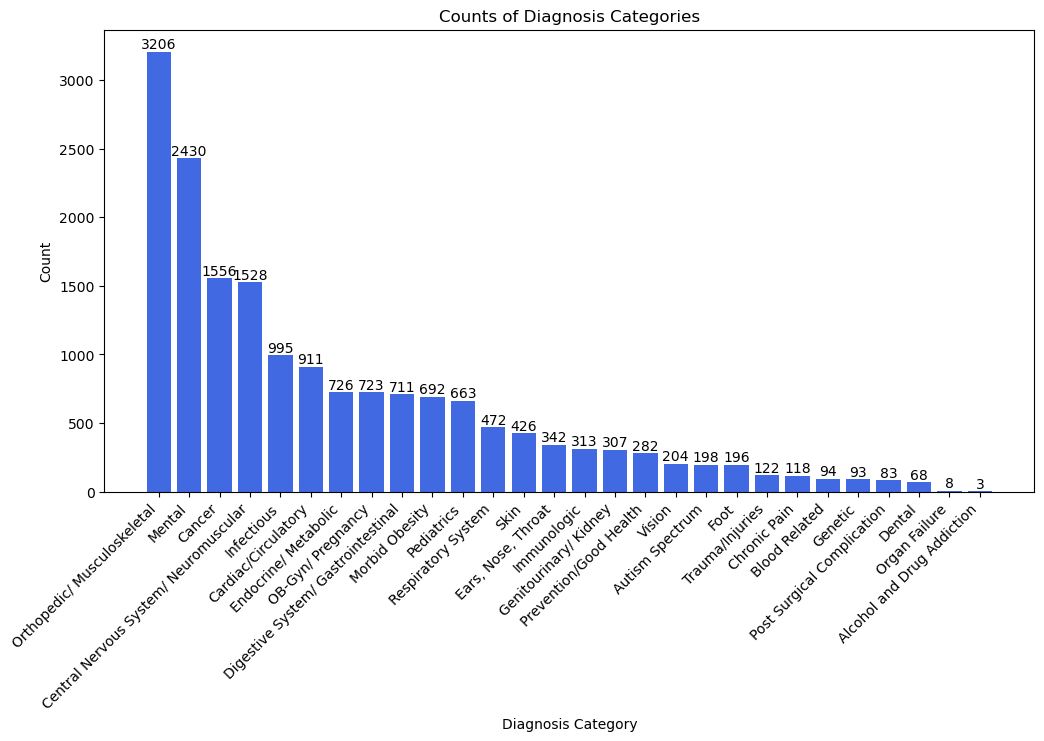

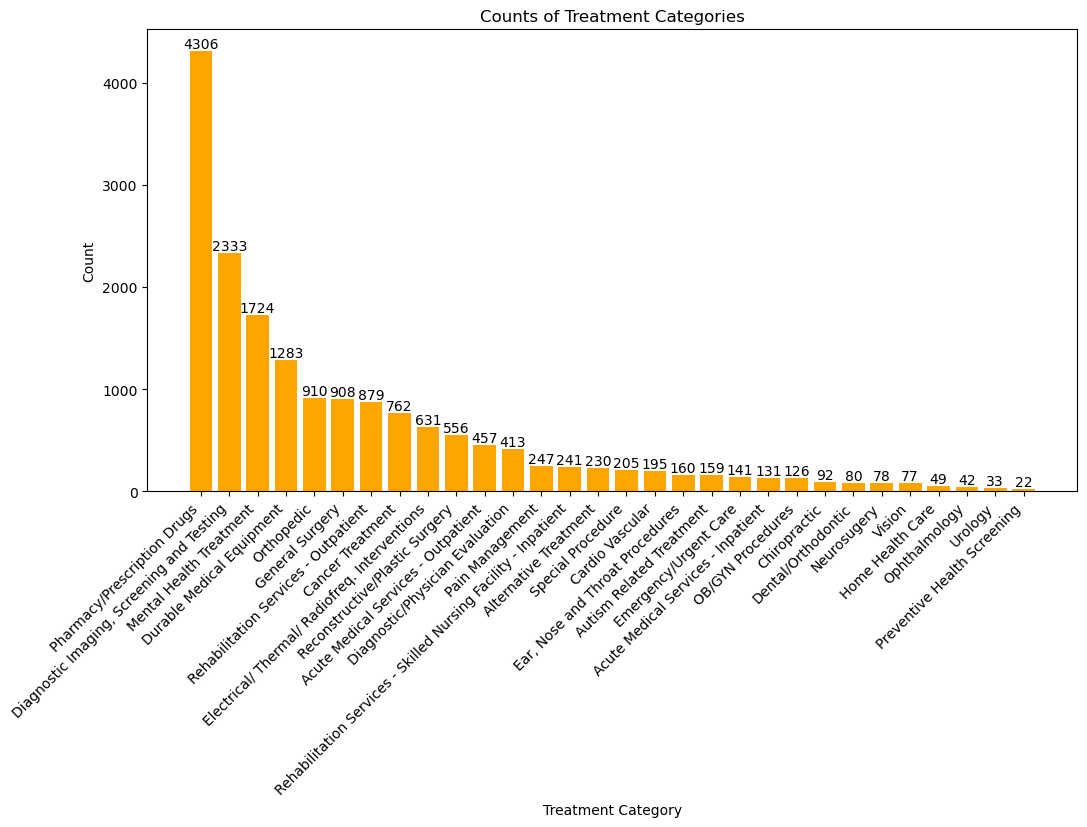

In [13]:
# Plotting the bar plot for Diagnosis Categories
plt.figure(figsize=(12, 6))
bars = plt.bar(diagnosis_counts.index, diagnosis_counts.values, color='royalblue')
plt.title('Counts of Diagnosis Categories')
plt.xticks(rotation=45, ha='right')  # Align the labels to the right
plt.ylabel('Count')
plt.xlabel('Diagnosis Category')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()
print()

# Plotting the bar plot for Treatment Categories
plt.figure(figsize=(12, 6))
bars = plt.bar(treatment_counts.index, treatment_counts.values, color='orange')
plt.title('Counts of Treatment Categories')
plt.xticks(rotation=45, ha='right')  # Align the labels to the right
plt.ylabel('Count')
plt.xlabel('Treatment Category')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

Orthopedic/Musculoskeletal, Mental, and Cancer top the list of most common diagnosis categories involved in Independent Medial Reviews (IMR). 

Pharmacy/Prescription Drugs, Diagnostic Imaging, Screening and Testing, and Mental Health Treatment top the list of most common treatment categories involved in IMRs. 

#### Exploration #3: Sub Categories

In [14]:
sub_diagnosis_counts = imr_final['Diagnosis Sub Category'].value_counts()
print(sub_diagnosis_counts)
print()

sub_treatment_counts = imr_final['Treatment Sub Category'].value_counts()
print(sub_treatment_counts)


Diagnosis Sub Category
Other                     3514
Hepatitis                  780
Back Pain                  585
Vertebral Disc Problem     467
Breast Cancer              382
                          ... 
Pyelonephritis               1
Peptic Ulcer Disease         1
Injury or Trauma             1
Herpes Simplex               1
Sports Related Injury        1
Name: count, Length: 272, dtype: int64

Treatment Sub Category
Other                                       4554
Anti-virals                                  752
Speech Therapy                               615
Residential Treatment Center - Admission     595
MRI                                          523
                                            ... 
Floor-Time Therapy                             1
Intensive Home Therapy                         1
TMJ Splint                                     1
Conscious Sedation                             1
ACL (Anterior Ligament Cruciate) Repair        1
Name: count, Length: 272, dtype: i

The counts of subcategories reveal a large chunk of data in the 'Other' category. It would be good to look into the other data in more detail to explore how it's associated with the other categories. This will hopefully provide insight into what would be the best way to work with the data. 

In [15]:
# Looking at 'Other' data

# Filter for rows where Diagnosis Sub Category is 'Other'
other_diagnosis_data = imr_final[
    (imr_final['Diagnosis Sub Category'] == 'Other') |
    (imr_final['Diagnosis Sub Category'].isna())
]

# Filter for rows where Treatment Sub Category is 'Other'
other_treatment_data = imr_final[
    (imr_final['Treatment Sub Category'] == 'Other') |
    (imr_final['Treatment Sub Category'].isna())
]

# Display the first few rows of the filtered data
print("Diagnosis Sub Category - Other/NaN:")
display(other_diagnosis_data.head(10))

print("\nTreatment Sub Category - Other/NaN:")
display(other_treatment_data.head(10))

# View the shape of the filtered data
print("\nShape of Other Diagnosis Data:", other_diagnosis_data.shape)
print("Shape of Other Treatment Data:", other_treatment_data.shape)

Diagnosis Sub Category - Other/NaN:


,Age Range,Determination,Diagnosis Category,Diagnosis Sub Category,Patient Gender,Report Year,Treatment Category,Treatment Sub Category,Type
3,65+,Overturned Decision of Health Plan,Prevention/Good Health,NaN,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational
4,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,NaN,Male,2006,Cardio Vascular,NaN,Experimental/Investigational
5,21-30,Upheld Decision of Health Plan,Prevention/Good Health,NaN,Male,2016,"Diagnostic Imaging, Screening and Testing",Lab Work,Experimental/Investigational
9,11_20,Upheld Decision of Health Plan,Digestive System/ Gastrointestinal,Other,Female,2016,"Diagnostic Imaging, Screening and Testing",Allergy Testing,Experimental/Investigational
11,51-64,Overturned Decision of Health Plan,Prevention/Good Health,NaN,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational
14,51-64,Overturned Decision of Health Plan,OB-Gyn/ Pregnancy,Other,Female,2016,"Diagnostic Imaging, Screening and Testing",X-Ray,Experimental/Investigational
15,21-30,Overturned Decision of Health Plan,Central Nervous System/ Neuromuscular,Other,Female,2016,"Diagnostic Imaging, Screening and Testing",Lab Work,Experimental/Investigational
20,51-64,Overturned Decision of Health Plan,Prevention/Good Health,NaN,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational
21,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,NaN,Female,2016,Pharmacy/Prescription Drugs,Other,Medical Necessity
22,51-64,Overturned Decision of Health Plan,OB-Gyn/ Pregnancy,Other,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational



Treatment Sub Category - Other/NaN:


,Age Range,Determination,Diagnosis Category,Diagnosis Sub Category,Patient Gender,Report Year,Treatment Category,Treatment Sub Category,Type
4,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,NaN,Male,2006,Cardio Vascular,NaN,Experimental/Investigational
12,41-50,Upheld Decision of Health Plan,Orthopedic/ Musculoskeletal,Fracture,Male,2016,Durable Medical Equipment,Other,Experimental/Investigational
21,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,NaN,Female,2016,Pharmacy/Prescription Drugs,Other,Medical Necessity
24,51-64,Upheld Decision of Health Plan,Orthopedic/ Musculoskeletal,Other,Female,2016,Orthopedic,Other,Experimental/Investigational
34,51-64,Upheld Decision of Health Plan,Digestive System/ Gastrointestinal,NaN,Male,2015,General Surgery,Other,Medical Necessity
38,51-64,Overturned Decision of Health Plan,Cardiac/Circulatory,Hypertension,Female,2016,Cardio Vascular,Other,Experimental/Investigational
49,41-50,Upheld Decision of Health Plan,Orthopedic/ Musculoskeletal,Hip Problem,Female,2015,Pharmacy/Prescription Drugs,Other,Experimental/Investigational
50,41-50,Overturned Decision of Health Plan,Chronic Pain,NaN,Female,2016,Pain Management,Other,Medical Necessity
51,41-50,Overturned Decision of Health Plan,Respiratory System,Asthma,Female,2016,General Surgery,Other,Experimental/Investigational
53,51-64,Overturned Decision of Health Plan,Cancer,Breast Cancer,Female,2016,"Diagnostic Imaging, Screening and Testing",Other,Experimental/Investigational



Shape of Other Diagnosis Data: (5237, 9)
Shape of Other Treatment Data: (5650, 9)


In order to improve the number of values listed as 'Other', 'No Subcategory', or 'NaN' in the sub category columns for diagnosis and treatment, these values will be replaced with their corresponding parent category of diagnosis or treatment. The idea is to maintain the meaning of the data as it goes through training and testing through the model. 

First, I want to look at the full count of each sub category and view the list of all unique values under the Treatment and Diagnosis Sub Category. 

In [16]:
# Count occurrences of each subcategory
sub_diagnosis_counts = imr_final['Diagnosis Sub Category'].value_counts()
sub_treatment_counts = imr_final['Treatment Sub Category'].value_counts()

# Convert counts to DataFrame for better formatting
sub_diagnosis_df = sub_diagnosis_counts.reset_index()
sub_diagnosis_df.columns = ['Diagnosis Sub Category', 'Count']

sub_treatment_df = sub_treatment_counts.reset_index()
sub_treatment_df.columns = ['Treatment Sub Category', 'Count']

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Then print the DataFrames again
print("Diagnosis Sub Category Counts:")
print(sub_diagnosis_df)

print("\nTreatment Sub Category Counts:")
print(sub_treatment_df)

# Reset options to default
pd.reset_option('display.max_rows')


Diagnosis Sub Category Counts:
                                Diagnosis Sub Category  Count
0                                                Other   3514
1                                            Hepatitis    780
2                                            Back Pain    585
3                               Vertebral Disc Problem    467
4                                        Breast Cancer    382
5                                       Delayed Speech    337
6                                       Osteoarthritis    311
7                                      Eating Disorder    300
8                                  Depression - Severe    291
9                                           Depression    281
10                                        Hypertension    266
11                                            Diabetes    261
12                              Female Breast Disorder    254
13                                    Bipolar Disorder    247
14                          Substance A

After reviewing the list of subcategories, most of the counts are highest above 170. Using this as the threshold, I will include all subcategories below this number in a function to change the subcategory name to it's parent category name. 

Included in the function is matching any subcategories that are null/NaN, 'Other', or 'No Subcategory' and replacing the subcategory name with the parent category name. 

The hope is that this change will maintain the integrity of the data and avoid losing the meaning behind the information or generalizing with 'Other'.

In [17]:
# Handle infrequent counts of subcategories

# Create a mapping for diagnosis and treatment subcategories
sub_diagnosis_mapping = sub_diagnosis_df.set_index('Diagnosis Sub Category')['Count']
sub_treatment_mapping = sub_treatment_df.set_index('Treatment Sub Category')['Count']

# Threshold for combining categories with parent categories
threshold = 170

# Function to replace 'Other' or NaN with the parent category and to replace infrequent subcategories
def replace_with_parent_category(df):
    
    # Replace in Diagnosis Sub Category
    df.loc[
        df['Diagnosis Sub Category'].isna() | 
        (df['Diagnosis Sub Category'] == 'Other') |
        (df['Diagnosis Sub Category'] == 'No Subcategory') |
        (df['Diagnosis Sub Category'].isin(sub_diagnosis_mapping[sub_diagnosis_mapping < threshold].index)),
        'Diagnosis Sub Category'] = df['Diagnosis Category']
    
    # Replace in Treatment Sub Category
    df.loc[
        df['Treatment Sub Category'].isna() | 
        (df['Treatment Sub Category'] == 'Other') |
        (df['Treatment Sub Category'] == 'No Subcategory') |
        (df['Treatment Sub Category'].isin(sub_treatment_mapping[sub_treatment_mapping < threshold].index)),
        'Treatment Sub Category'] = df['Treatment Category']
    

# Apply the function to replace values
replace_with_parent_category(imr_final)

# Check the new counts
new_sub_diagnosis_counts = imr_final['Diagnosis Sub Category'].value_counts()
print("\nDiagnosis Sub Category counts:")
print(new_sub_diagnosis_counts.head(10))
print()

new_sub_treatment_counts = imr_final['Treatment Sub Category'].value_counts()
print("Treatment Sub Category counts:")
print(new_sub_treatment_counts.head(10))

# Display the updated DataFrame
display(imr_final)


Diagnosis Sub Category counts:
Diagnosis Sub Category
Orthopedic/ Musculoskeletal              1847
Central Nervous System/ Neuromuscular    1344
Mental                                   1070
Cancer                                    951
Cardiac/Circulatory                       824
Hepatitis                                 780
Digestive System/ Gastrointestinal        711
Back Pain                                 585
Morbid Obesity                            513
Respiratory System                        472
Name: count, dtype: int64

Treatment Sub Category counts:
Treatment Sub Category
Pharmacy/Prescription Drugs                      2288
Durable Medical Equipment                        1283
Orthopedic                                        910
General Surgery                                   908
Diagnostic Imaging, Screening and Testing         866
Mental Health Treatment                           842
Anti-virals                                       752
Electrical/ Thermal/ Radio

,Age Range,Determination,Diagnosis Category,Diagnosis Sub Category,Patient Gender,Report Year,Treatment Category,Treatment Sub Category,Type
0,41-50,Overturned Decision of Health Plan,Infectious,Hepatitis,Male,2016,Pharmacy/Prescription Drugs,Anti-virals,Medical Necessity
1,21-30,Upheld Decision of Health Plan,Mental,Eating Disorder,Female,2016,Mental Health Treatment,Residential Treatment Center - Admission,Medical Necessity
2,0-10,Upheld Decision of Health Plan,Autism Spectrum,Autism-PDD-NOS,Female,2016,Autism Related Treatment,Speech Therapy,Medical Necessity
3,65+,Overturned Decision of Health Plan,Prevention/Good Health,Prevention/Good Health,Female,2016,"Diagnostic Imaging, Screening and Testing",Mammography,Experimental/Investigational
4,51-64,Upheld Decision of Health Plan,Cardiac/Circulatory,Cardiac/Circulatory,Male,2006,Cardio Vascular,Cardio Vascular,Experimental/Investigational
...,...,...,...,...,...,...,...,...,...
18048,31-40,Upheld Decision of Health Plan,Orthopedic/ Musculoskeletal,Orthopedic/ Musculoskeletal,Male,2003,"Diagnostic Imaging, Screening and Testing",MRI,Medical Necessity
18049,41-50,Overturned Decision of Health Plan,Mental,Bipolar Disorder,Female,2003,Pharmacy/Prescription Drugs,Formulary versus Non-Formulary,Medical Necessity
18224,31-40,Overturned Decision of Health Plan,OB-Gyn/ Pregnancy,OB-Gyn/ Pregnancy,Female,2002,Acute Medical Services - Outpatient,Emergency Room,Urgent Care
18238,51-64,Upheld Decision of Health Plan,Cancer,Prostate Cancer,Male,2002,Electrical/ Thermal/ Radiofreq. Interventions,Electrical/ Thermal/ Radiofreq. Interventions,Medical Necessity


The new counts for sub categories show no other categories at the top. 

In [18]:
print('Unique Counts:\n', imr_final.nunique())
print()
print('Null Value Counts:\n', imr_final.isnull().sum())

Unique Counts:
 Age Range                  7
Determination              2
Diagnosis Category        28
Diagnosis Sub Category    46
Patient Gender             2
Report Year               15
Treatment Category        30
Treatment Sub Category    46
Type                       3
dtype: int64

Null Value Counts:
 Age Range                 0
Determination             0
Diagnosis Category        0
Diagnosis Sub Category    0
Patient Gender            0
Report Year               0
Treatment Category        0
Treatment Sub Category    0
Type                      0
dtype: int64


Unique counts of Diagnosis Sub Category and Treatment Sub Category went down from 272 to 46 subcategories. 

This change was successful in changing the sub category data into meaningful categories for modeling purposes. The null values were also handled in this process. 

Now, some visualizations to compare how the changes improved the distribution of the data.

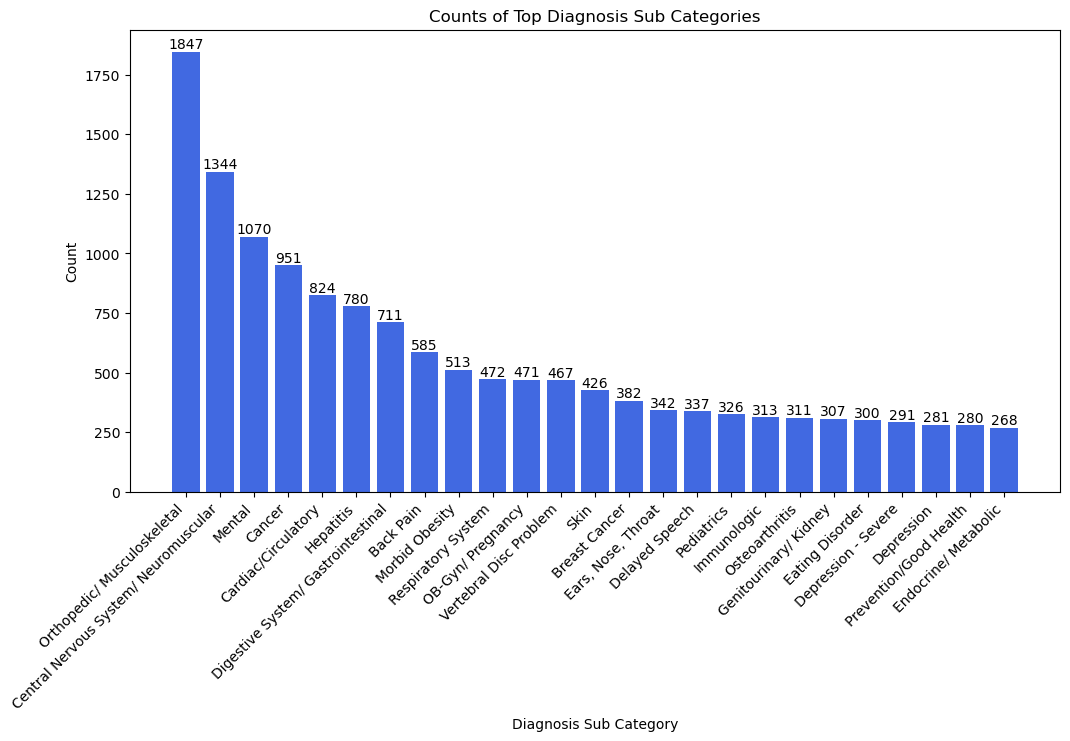

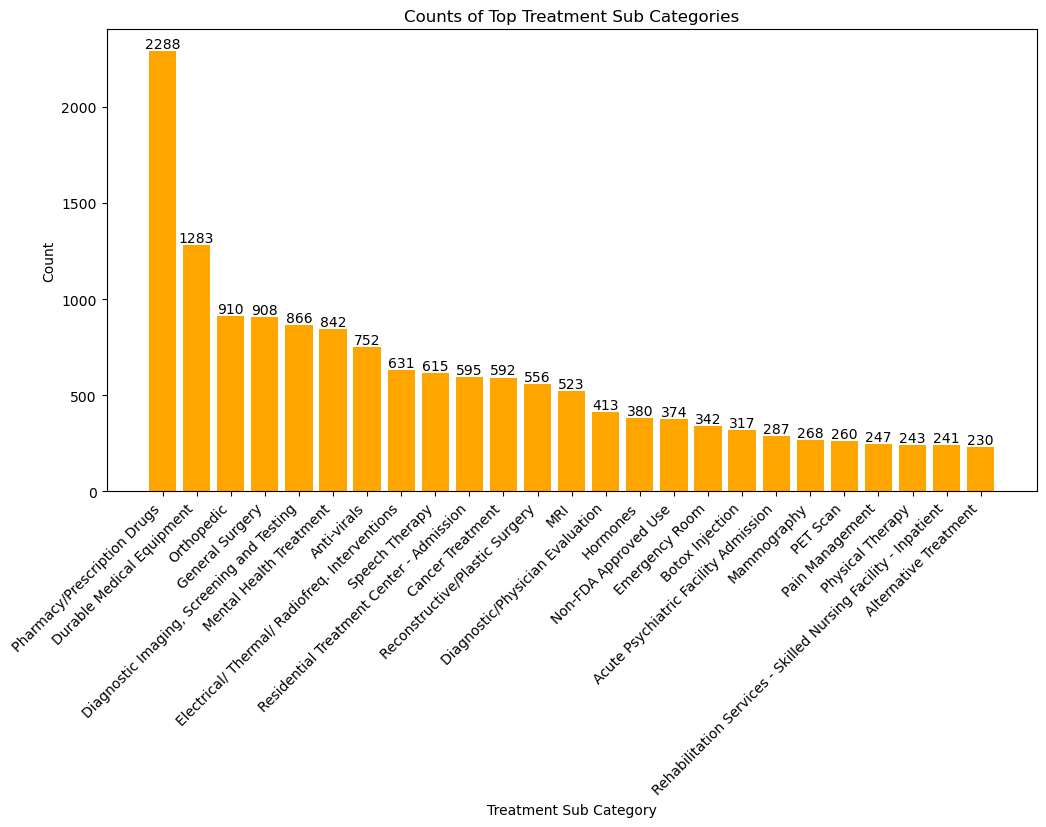

In [19]:
# Plotting the bar plot for Top Diagnosis Sub Categories

# Get top N categories
top_n = 25
top_diagnosis = new_sub_diagnosis_counts.head(top_n)
top_treatment = new_sub_treatment_counts.head(top_n)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_diagnosis.index, top_diagnosis.values, color='royalblue')
plt.title('Counts of Top Diagnosis Sub Categories')
plt.xticks(rotation=45, ha='right')  # Align the labels to the right
plt.ylabel('Count')
plt.xlabel('Diagnosis Sub Category')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()
print()

# Plotting the bar plot for Top Treatment Sub Categories
plt.figure(figsize=(12, 6))
bars = plt.bar(top_treatment.index, top_treatment.values, color='orange')
plt.title('Counts of Top Treatment Sub Categories')
plt.xticks(rotation=45, ha='right')  # Align the labels to the right
plt.ylabel('Count')
plt.xlabel('Treatment Sub Category')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

#### Data Visualizations Related to EDA

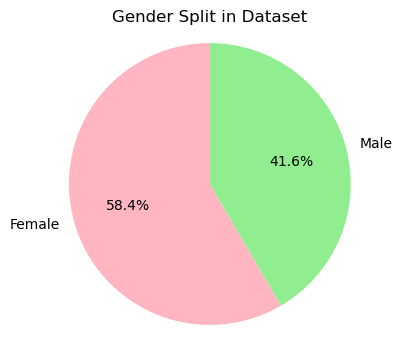

In [20]:
# Gender Distribution Pie Chart

gender_counts = imr_final['Patient Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightgreen'])
plt.title('Gender Split in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart shows a slightly higher proportion of female patient case reviews presented for IMR. 

<Figure size 1200x600 with 0 Axes>

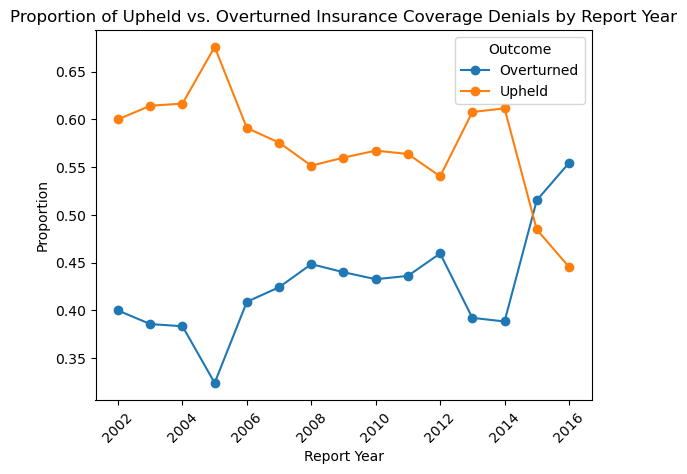

In [21]:
# Line plot of Proportion of Upheld versus Overturned Insurance Coverage Denials by Report Year

plt.figure(figsize=(12, 6))
proportions = imr_final.groupby('Report Year')['Determination'].value_counts(normalize=True).unstack()
proportions.plot(kind='line', marker='o')
plt.title('Proportion of Upheld vs. Overturned Insurance Coverage Denials by Report Year')
plt.xlabel('Report Year')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Overturned', 'Upheld'])
plt.show()

The line plot shows an interesting inverted relationship between overturned and upheld IMR cases. This also shows that over time, the IMRs have shifted towards overturning insurance decisions over upholding them. 

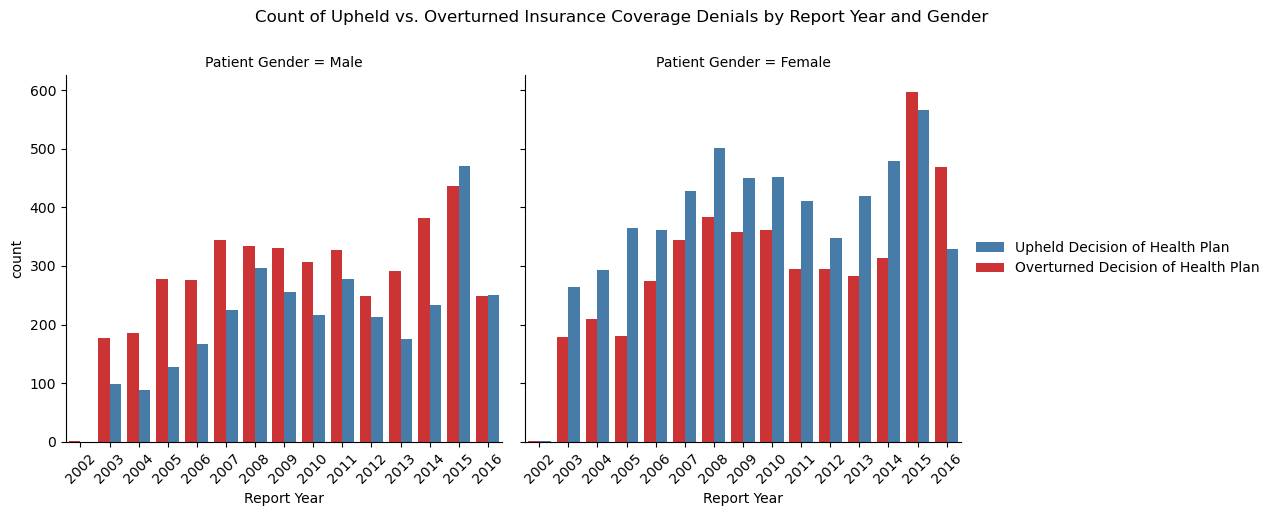

In [22]:
# Facet Grid showing Count of Upheld versus Overturned Insurance Coverage Denials by Report Year and Gender

g = sns.FacetGrid(imr_final, col="Patient Gender", height=5)
g.map_dataframe(sns.countplot, x="Report Year", hue="Determination", palette='Set1',
     order=sorted(imr_final["Report Year"].unique()))
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Count of Upheld vs. Overturned Insurance Coverage Denials by Report Year and Gender')

for ax in g.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show()

This facet grid between male and female patients shows a strong pattern of upholding insurance decisions related to female cases for every year between 2002 and 2014. There appears to be a noticeable change starting in 2015 where insurance decisions related to female cases were overturned by the IMR. 

For male patients, the overwhelming trend is the IMR overturns insurance decisions denying treatment. There was a reversal of this pattern in 2015 by a small number of cases and a seemingly even split in 2016. 

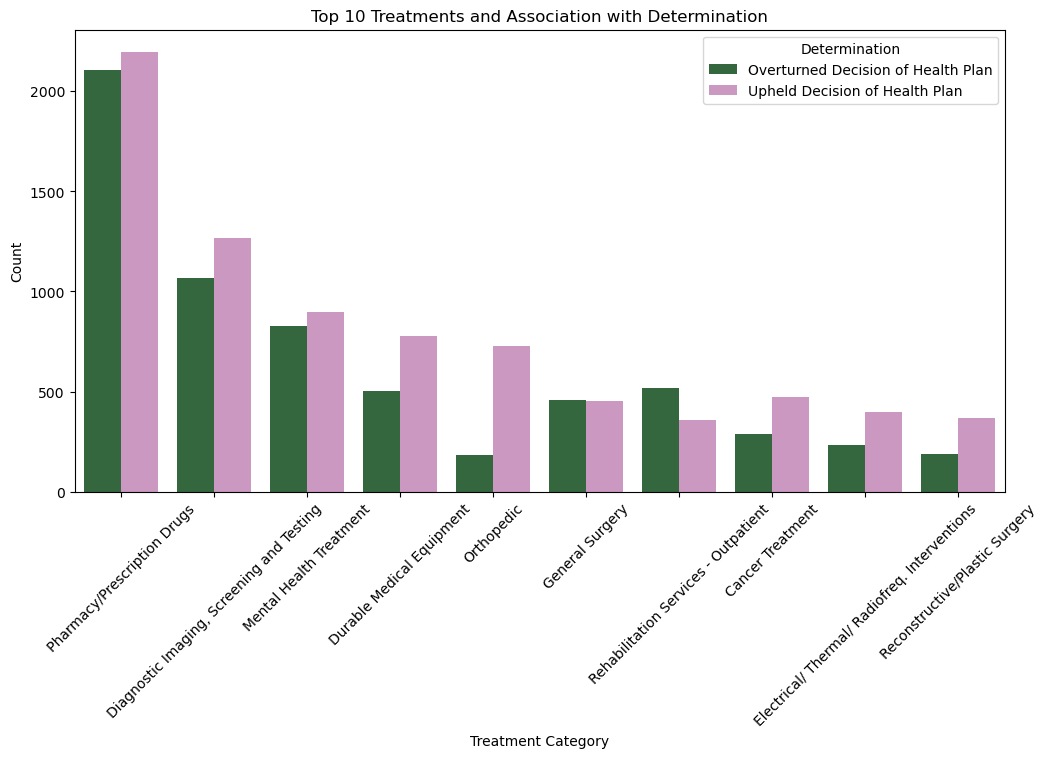

In [23]:
# Bar plot showing Top 10 Treatments and their Association with Determination of the IMR

# Get top 10 treatments for each year
top_treatments = (imr_final.groupby(['Report Year', 'Treatment Category'])
                  .size().reset_index(name='Count'))

# Find the top 10 treatments across all years
top_10_treatments = (top_treatments.groupby('Treatment Category')['Count']
                     .sum().nlargest(10).index)

# Filter the original DataFrame for only top 10 treatments
filtered_data = imr_final[imr_final['Treatment Category'].isin(top_10_treatments)]

# Create a count plot to visualize the association
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Treatment Category', hue='Determination', 
              order=top_10_treatments, palette='cubehelix')

plt.title('Top 10 Treatments and Association with Determination')
plt.xlabel('Treatment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Determination')
plt.show()

This bar plot shows a majority of the top 10 treatments that end up in IMR, the insurance decision is upheld. The treatment category for General Surgery is about dead even on whether the IMR upholds or overturns the insurance denial. 

The treatment category for Rehabilitation Services - Outpatient shows most cases are overturned by the IMR where insurance is paying for this treatment as a result of the decsion. 

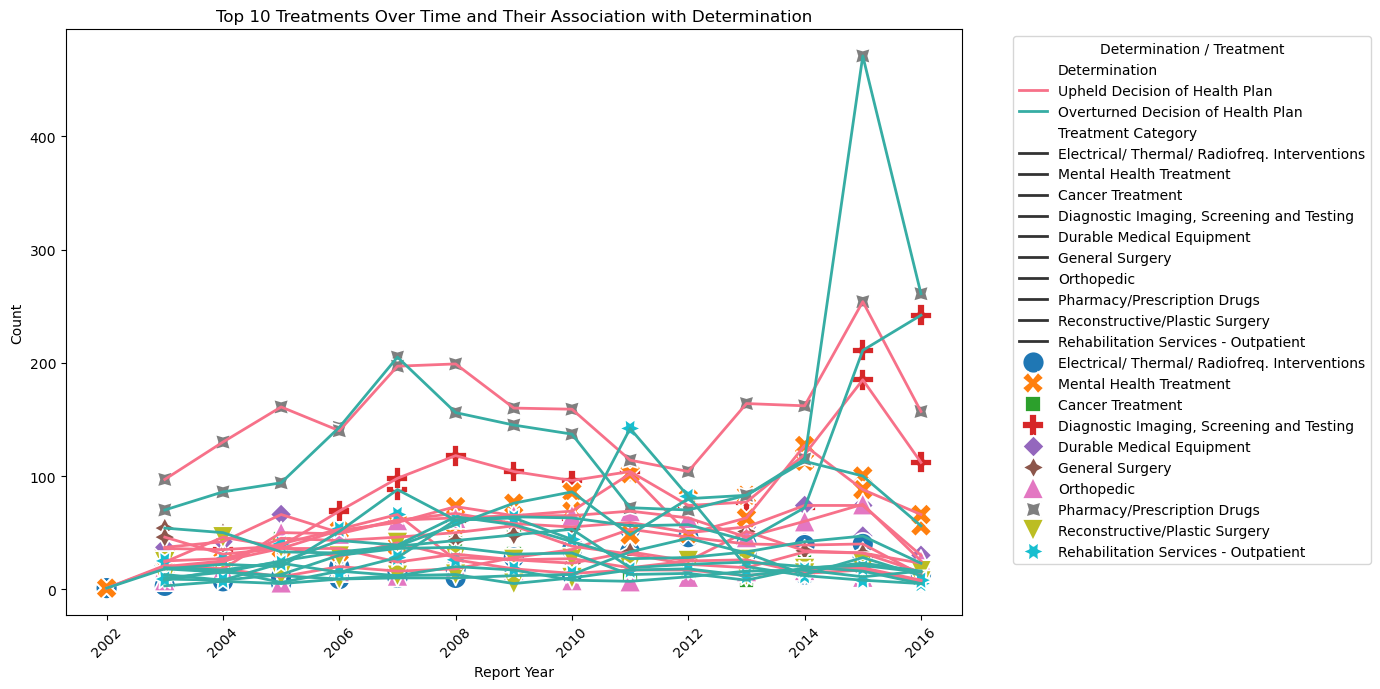

In [24]:
# Line plot/Scatter plot of Treatment category based on Determination over time

# Count occurrences of each treatment per year and determination
count_data = (imr_final.groupby(['Report Year', 'Treatment Category', 'Determination'])
               .size().reset_index(name='Count'))

# Get the top 10 treatments
top_treatments = (count_data.groupby('Treatment Category')['Count']
                  .sum().nlargest(10).index)

# Filter for top treatments
filtered_count_data = count_data[count_data['Treatment Category'].isin(top_treatments)]

# Create the plot
plt.figure(figsize=(14, 7))
determination_palette = sns.color_palette("husl", 2)

sns.lineplot(data=filtered_count_data, 
             x='Report Year', 
             y='Count', 
             hue='Determination', 
             style='Treatment Category', 
             dashes=False, 
             palette=determination_palette,
             linewidth=2)

sns.scatterplot(data=filtered_count_data, x='Report Year', y='Count', 
                hue='Treatment Category', style='Treatment Category', 
                s=250, edgecolor='white')

plt.title('Top 10 Treatments Over Time and Their Association with Determination')
plt.xlabel('Report Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Determination / Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line plot/scatter plot clearly shows the trend of the top ten treatments and how the determination of the IMR relates to the treatment over time. 

While most of the top ten are clusterd near the bottom of the chart and contain mostly green lines (overturned), this is a good visual for how low the frequency of overturning insurance decisions were over the time period. 

Three of the treatments that stand out here are: 
1. Pharmacy/Prescription Drugs
2. Diagnostic Imaging, Screening, and Testing
3. Mendal Health Treatment

Pharmacy/Prescription Drugs appear to be the most contentious treatment category with IMR results and in recent years, especially between 2014 and 2016, have shown a strong result in overturning the decision of the health plan. 

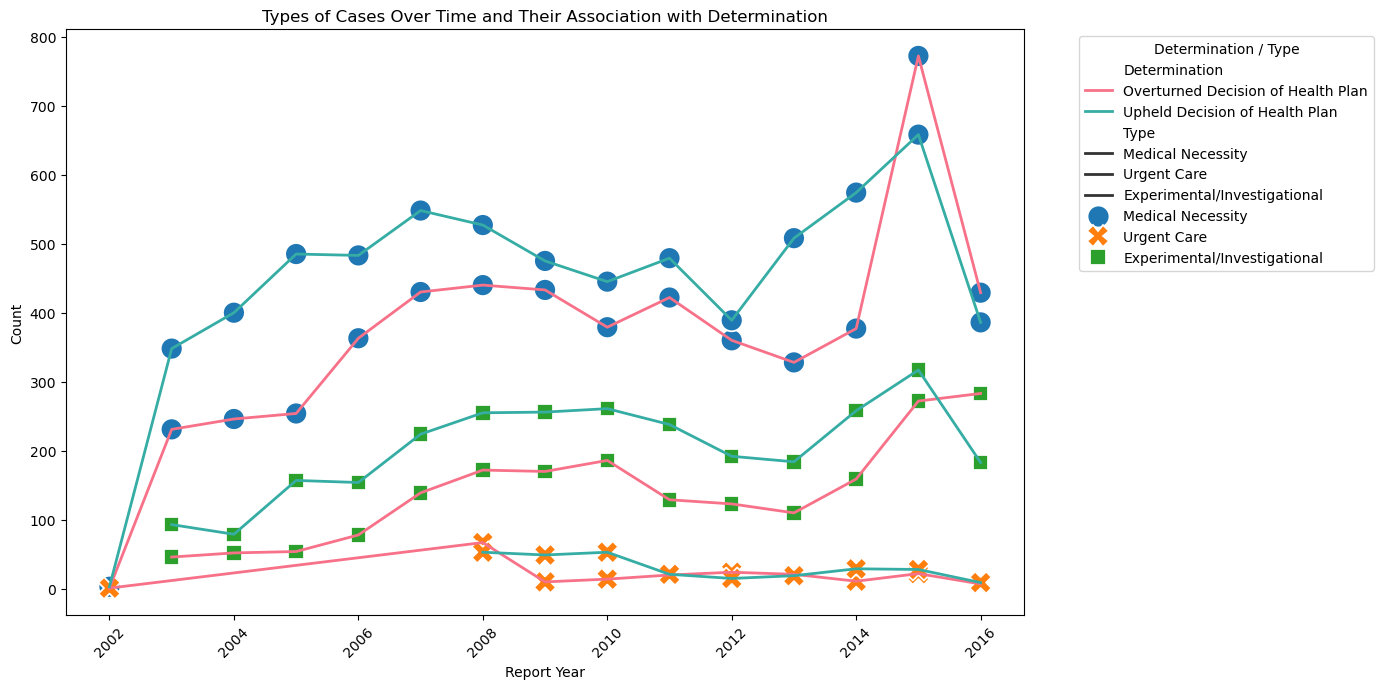

In [25]:
# Line plot/Scatter plot of Case Types presented for IMR

# Count occurrences of each type per year and determination
count_data = (imr_final.groupby(['Report Year', 'Type', 'Determination'])
               .size().reset_index(name='Count'))

# Filter for all types
filtered_count_data = count_data

# Create the plot
plt.figure(figsize=(14, 7))
determination_palette = sns.color_palette("husl", 2)

# Line plot for counts by year and determination
sns.lineplot(data=filtered_count_data, 
             x='Report Year', 
             y='Count', 
             hue='Determination', 
             style='Type', 
             dashes=False, 
             palette=determination_palette,
             linewidth=2)

# Scatter plot for counts by year and type
sns.scatterplot(data=filtered_count_data, x='Report Year', y='Count', 
                hue='Type', style='Type', 
                s=250, edgecolor='white')

plt.title('Types of Cases Over Time and Their Association with Determination')
plt.xlabel('Report Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Determination / Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Looking at the types of cases that go for IMR, a majority involve cases related to medical necessity. Here, there was a shift in determination around 2014 where most health plan decisions related to medical necessity were overturned by the IMR. 

It is not suprising that the outcome of the IMR related to the experimental/investigational cases consistently upholds the health plan decision over the time period. There is a slight shift in 2016 where experimental/investigational treatments showed an uptick in IMR overturning the decision of the patient's health plan. 

The urgent care cases seem to be a new category in the IMR cases as the data on this case type doesn't begin until 2008. There appears to be a 50/50 IMR determination rate in this case type. 

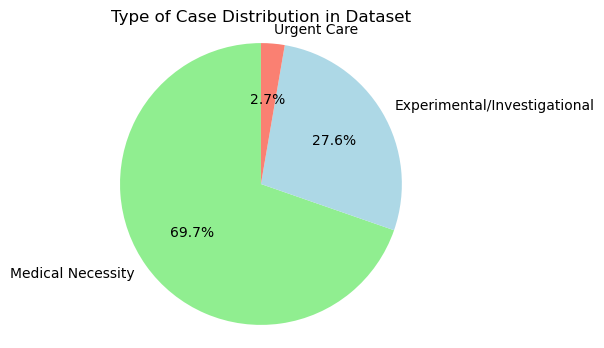

In [26]:
# Pie Chart showing Type of Case Distribution

type_counts = imr_final['Type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Type of Case Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Looking at the types of cases brought to IMR, medical necessity is overwhelmingly dominant among the cases reviewed. | 

#### Encoding: Convert Categorical Variables

In [27]:
# Encode the target variable
label_encoder = LabelEncoder()
imr_final['Determination'] = label_encoder.fit_transform(imr_final['Determination'])

# One-hot encode categorical features (excluding target variable)
imr_final = pd.get_dummies(imr_final, columns=['Age Range', 'Diagnosis Category', 
                                  'Diagnosis Sub Category', 'Patient Gender', 
                                  'Report Year', 'Treatment Category', 
                                  'Treatment Sub Category', 'Type'], drop_first=True)

Encoding categorical variables to preprocess the data before applying it to the machine learning models. This will help with processing as most models work with numerical data and improve performance of the model in finding patterns in the data. 

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 4: Data Modeling</b></font>
    </font>  <br>
</h2>
</html>

In [28]:
# Define features and target variables
X = imr_final.drop('Determination', axis=1)
y = imr_final['Determination']

# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
# Confirming train/test split of data 80:20 %
print('Train set split: ', y_train.value_counts(normalize=True))
print('Test set split: ', y_test.value_counts(normalize=True))

Train set split:  Determination
1    0.558887
0    0.441113
Name: proportion, dtype: float64
Test set split:  Determination
1    0.579279
0    0.420721
Name: proportion, dtype: float64


### Data Model 1: XG Boost


In [30]:
# XGBOOST Classifier

# Calculate class weights to help balance the dataset
n_positive = sum(y_train)
n_negative = len(y_train) - n_positive
scale_pos_weight = n_negative / n_positive

# Create the XGBoost classifier
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')

# Fit the model to the training data
xgb.fit(X_train, y_train)

print('XG Boost Clasifier created')
xgb

XG Boost Clasifier created


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [31]:
# Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 1]
}

# Create the GridSearchCV object
xgb_model = GridSearchCV(estimator=xgb, param_grid=param_grid,
                         scoring='accuracy', cv=5, verbose=1)

# Fit the grid search to the data
xgb_model.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", xgb_model.best_params_)
print('Best Cross-Validation score: ', xgb_model.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best Cross-Validation score:  0.6358037677131398


#### Summary


For tuning the hyperparameters of the model, I added the Gamma parameter to assist in regularization of the data and decrease issues with overfitting. 
The max depth of 7 creates deep trees for complex decision boundaries for the large dataset. 

### Data Model 2: Random Forest


In [32]:
# Initialize model
rf = RandomForestClassifier(class_weight='balanced', random_state=123)

# Fit model
rf.fit(X_train, y_train)

print('Random Forest Clasifier created')
rf

Random Forest Clasifier created


RandomForestClassifier(class_weight='balanced', random_state=123)

In [33]:
# Hyperparameter Tuning and Training the Model

# Define parameters for Random Forest classifier
rf_parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearch model
rf_model = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=8, n_jobs=1, scoring='f1')

# Fit the GridSearch model with the training data 
rf_model.fit(X_train, y_train)

# Determine best parameters and best cross-validation score
print('Best parameters using grid search: ', rf_model.best_params_)
print('Best Cross-Validation score: ', rf_model.best_score_)

Best parameters using grid search:  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
Best Cross-Validation score:  0.6861728946012216


#### Summary


The model tuning difference when max_features parameters were added helped to increase the n_estimators from 10 to 100 and is a better number of trees for a random forest model. 

The max depth increased from 5 to 10, which may be better for the complex dataset. 

The max features accepted during the tuning was log2, and this change increased the two parameters above and slightly increased the cross-validation score closer to 0.70. 

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 5: Evaluate The Model Performance</b></font>
    </font>  <br>
</h2>
</html>

### XG Boost

In [34]:
best_params = xgb_model.best_params_

# Create the XGBoost classifier with the best parameters
xgb_best = xgb_model.best_estimator_

In [35]:
# Predictions 
xgb_pred_train = xgb_best.predict(X_train)
xgb_pred_test = xgb_best.predict(X_test)


# Evaluate accuracy of the model
xgb_train_accuracy = accuracy_score(y_train, xgb_pred_train)
xgb_test_accuracy = accuracy_score(y_test, xgb_pred_test)

print('Training accuracy: ', xgb_train_accuracy)
print('Testing accuracy: ', xgb_test_accuracy)

Training accuracy:  0.7150829994275901
Testing accuracy:  0.637378362907842


The accuracy score indicates the XG boost model is overfitting based on the gap between the training and testing accuracy scores. With the training set, the model does well, but has a hard time generalizing to the unseen data of the testing set. 

In [36]:
# Predicting the values of the test data
xgb_pred = xgb_best.predict(X_test)
print('Classification report \n', classification_report(y_test, xgb_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      1470
           1       0.70      0.66      0.68      2024

    accuracy                           0.64      3494
   macro avg       0.63      0.63      0.63      3494
weighted avg       0.64      0.64      0.64      3494



The classification report shows a class imbalance between Class 1 and Class 0. Class 1 performs well in this model. 

In [37]:
# Confusion matrix for training and testing data
cm_train_xgb = confusion_matrix(y_train, xgb_pred_train)
cm_test_xgb = confusion_matrix(y_test, xgb_pred_test)

print('Train Confusion Matrix \n', cm_train_xgb)
print('Test Confusion Matrix \n',cm_test_xgb)

Train Confusion Matrix 
 [[4284 1881]
 [2101 5710]]
Test Confusion Matrix 
 [[ 886  584]
 [ 683 1341]]


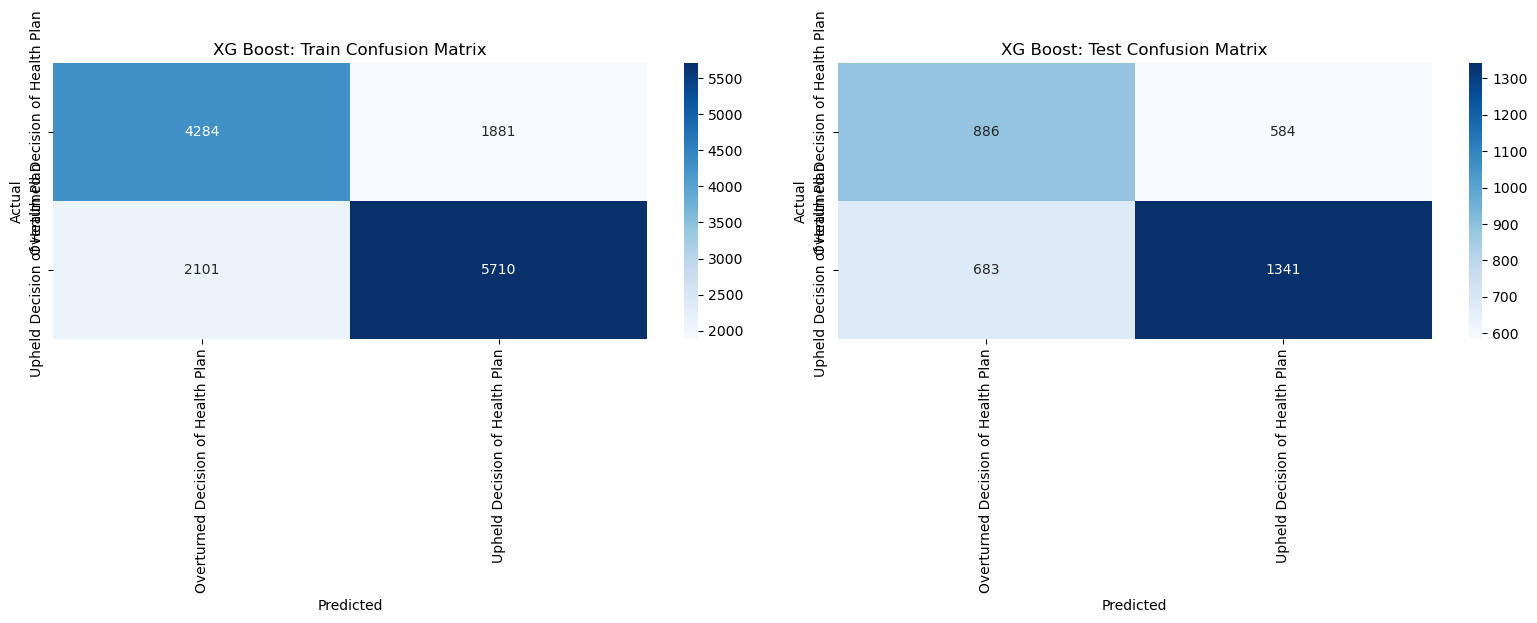

In [38]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2,figsize=(16,6))

sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title('XG Boost: Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title('XG Boost: Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Looking at the training confusion matrix, there is better performance than the test matrix, which may indicate overfitting. There are higher true positives and true negatives in the training confusion matrix. 

The model shows good performance on identifying upheld cases. 

#### Feature Importance Analysis

                                               Feature  Importance
0                     Diagnosis Sub Category_Hepatitis    0.123220
1                   Treatment Sub Category_Mammography    0.058826
2                Treatment Sub Category_Speech Therapy    0.054128
3       Diagnosis Category_Orthopedic/ Musculoskeletal    0.044536
4                        Treatment Category_Orthopedic    0.022234
..                                                 ...         ...
164  Treatment Sub Category_Diagnostic/Physician Ev...    0.000000
165  Treatment Sub Category_Ear, Nose and Throat Pr...    0.000000
166  Treatment Sub Category_Electrical/ Thermal/ Ra...    0.000000
167               Diagnosis Sub Category_Blood Related    0.000000
168             Treatment Sub Category_Cardio Vascular    0.000000

[169 rows x 2 columns]


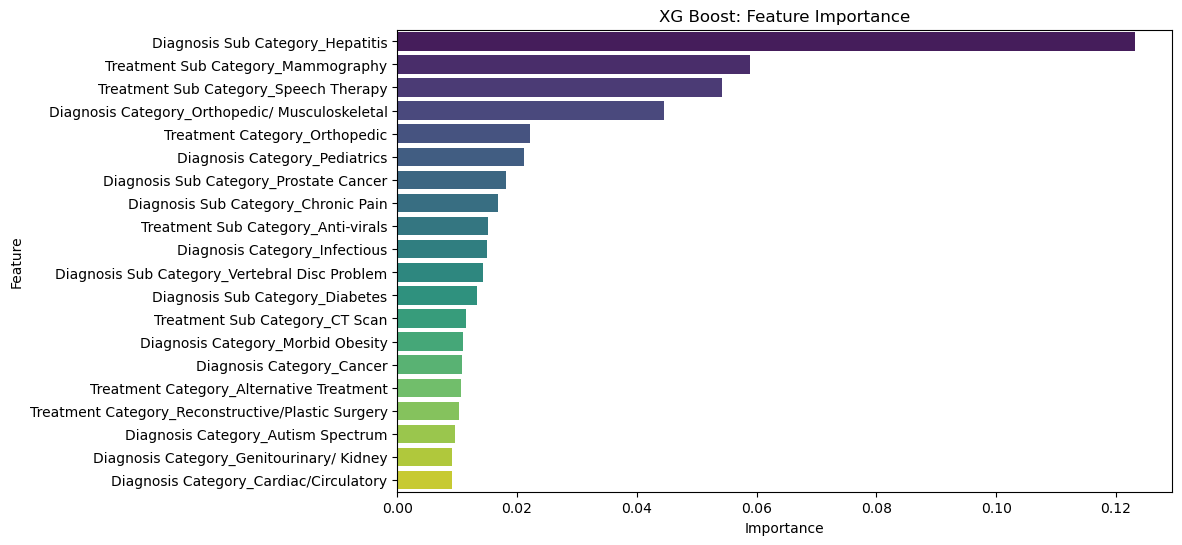

In [39]:
# Feature Importance XG Boost model

# Get feature importance
xgb_importances = xgb_best.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
})

# Sort the DataFrame by importance
sorted_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the ranked feature importances
print(sorted_importance_df.reset_index(drop=True))

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_importance_df.head(20), y='Feature', x='Importance', palette='viridis', hue='Feature', legend=False)
plt.title('XG Boost: Feature Importance')
plt.show()

#### Summary

Here's a visualization of the feature imporance in the XG Boost model. The top feature, Diagnosis Sub Category_Hepatitis, indicates the model relies heavily on this feature compared to the other features listed above. The next three in line are: Treatment Sub Category_Mammography, Treatment Sub_Category_Speech Therapy, and Diagnosis Category_Orthopedic/Musculoskeletal. 

###  Random Forest

In [40]:
# Train the Random Forest model using best parameters found
rf_best = rf_model.best_estimator_

# Fit the best algorithm to the data
rf_best.fit(X_train, y_train)

# Evaluate the Random Forest model 

# Predictions
rf_pred_train = rf_best.predict(X_train)
rf_pred_test = rf_best.predict(X_test)

# Evaluate accuracy of the model
rf_train_accuracy = accuracy_score(y_train, rf_pred_train)
rf_test_accuracy = accuracy_score(y_test, rf_pred_test)

print('Training accuracy: ', rf_train_accuracy)
print('Testing accuracy: ', rf_test_accuracy)

Training accuracy:  0.6856754436176302
Testing accuracy:  0.640812821980538


The training accuracy indicates the model performs well on the training dataset and correctly classifies a high percentage of instances. 

The training accuracy is higher than the testing accuracy, which may mean the model does not generalize well to unseen data possibly from overfitting. 

In [41]:
# Predicting the values of the test data
rf_pred = rf.predict(X_test)
print('Classification report \n', classification_report(y_test, rf_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      1470
           1       0.67      0.69      0.68      2024

    accuracy                           0.63      3494
   macro avg       0.62      0.62      0.62      3494
weighted avg       0.63      0.63      0.63      3494



The recall for overturned cases (class 0) is lower than upheld cases (class 1), meaning the model is better at identifying upheld cases (class 1). There could be class imbalance or model performance issues. 

The model demonstrates better performance for upheld cases (class 1) compared to overturned cases (class 0), as seen with higher precision, recall, and F1 scores. 

In [42]:
# Confusion matrix for training and testing data
cm_train_rf = confusion_matrix(y_train, rf_pred_train)
cm_test_rf = confusion_matrix(y_test, rf_pred_test)

print('Train Confusion Matrix \n', cm_train_rf)
print('Test Confusion Matrix \n',cm_test_rf)

Train Confusion Matrix 
 [[3610 2555]
 [1838 5973]]
Test Confusion Matrix 
 [[ 778  692]
 [ 563 1461]]


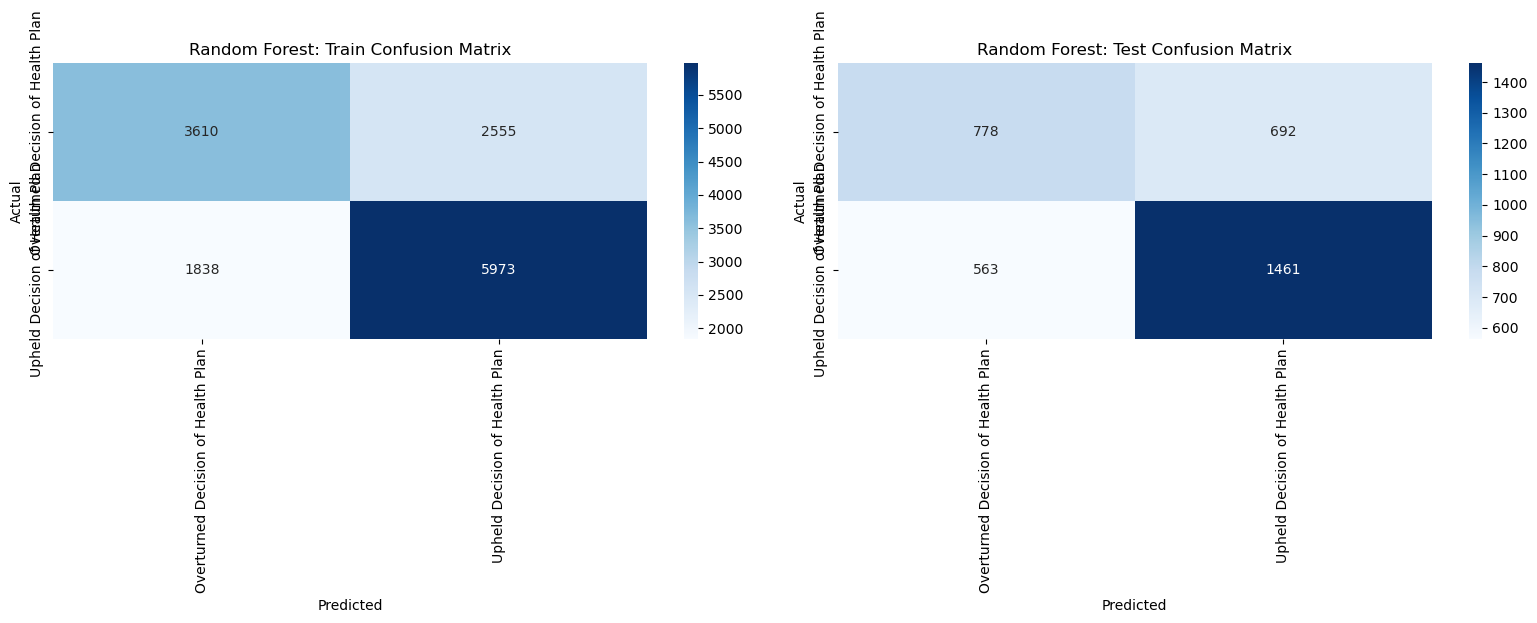

In [43]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2,figsize=(16,6))

sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title('Random Forest: Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title('Random Forest: Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### Summary

The model has a higher recall for upheld cases (class 1) than for overturned cases (class 0) in both the training and testing sets. 

The drop in recall for overturned cases (class 0) indicates the model may struggle with generalizing predictions for the overturned class, showing a potential for overfitting or class imbalance. 

There are high false positives for overturned cases (class 0). This indicates that many instances predicted as upheld are actually overturned. 

#### Feature Importance Analysis

                                            Feature  Importance
0                Treatment Sub Category_Mammography    0.065498
1                Treatment Sub Category_Anti-virals    0.057481
2                  Diagnosis Sub Category_Hepatitis    0.056974
3    Diagnosis Category_Orthopedic/ Musculoskeletal    0.044906
4                     Diagnosis Category_Infectious    0.038283
..                                              ...         ...
164        Treatment Sub Category_OB/GYN Procedures    0.000196
165                Diagnosis Category_Organ Failure    0.000132
166            Treatment Category_OB/GYN Procedures    0.000123
167            Diagnosis Sub Category_Organ Failure    0.000103
168            Diagnosis Sub Category_Blood Related    0.000064

[169 rows x 2 columns]


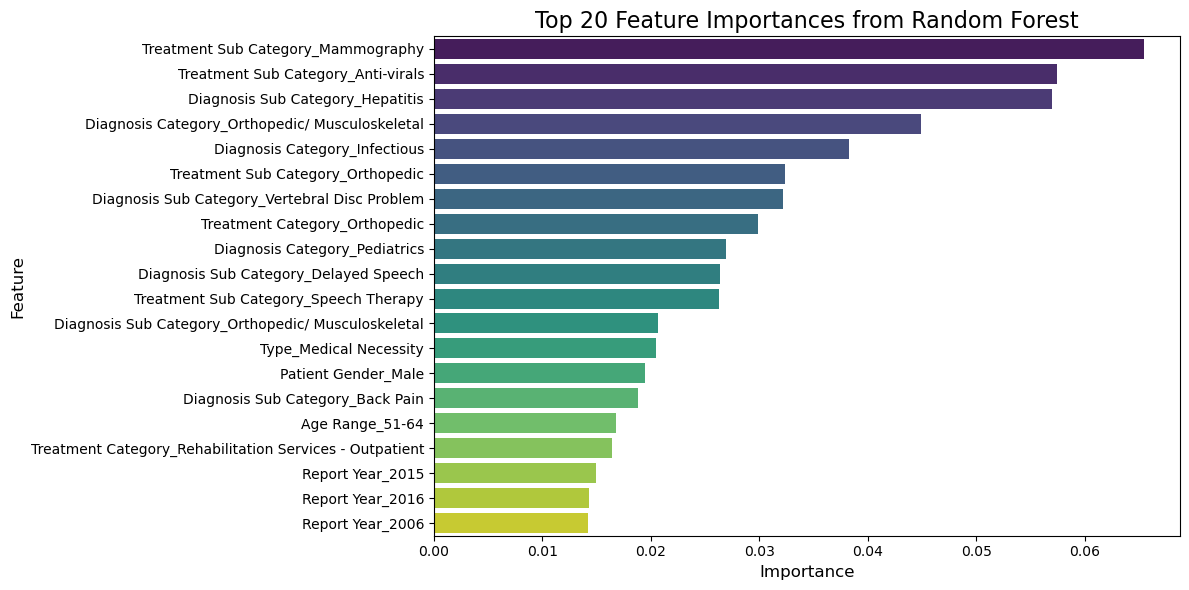

In [44]:
# RANDOM FOREST

# Get feature importance
importances = rf_best.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
sorted_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the ranked feature importances
print(sorted_importance_df.reset_index(drop=True))


# Set the figure size
plt.figure(figsize=(12, 6))

# Get top 20 features for plot
top_features = sorted_importance_df.head(20)

# Create a horizontal bar plot for feature importances
sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis', hue='Feature')

# Set the title and labels
plt.title('Top 20 Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Disable the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


#### Summary

Here, the top 3 feature importances for the Random Forest model were: Treatment Sub Category_Mammography, Treatment Sub Category_Anti-virals, and Diagnosis Sub Category_Hepatitis.

The model relies heavily on these features compared to the other features listed above. T

here are some features at the top that are identical to the XG Boost model's feature importance ranking.  

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Step 6: Describe And Interpret The Model</b></font>
    </font>  <br>
</h2>
</html>

#### Description of the Model

##### XG Boost:
This model uses an ensemble technique called boosting to combine the predictions of several weak learners (decision trees in this case) to produce a strong learner. The models are built sequentially, so each new model corrects the errors made by the previous ones. 

This model works well with large datasets and classification problems. It also handles missing values, provides tools for evaluating feature importance and several hyperparameter tuning options.

##### Random Forest: 
This model is an ensemble learning method used for classification problems. It combines predictions of multiple decision trees to improve accuracy and control overfitting. 
When the model constructs multiple trees during training, it outputs the mode of the classes, which aggregates and helps improve the model. 

This model randomly samples features for each split in the decision trees which allows for diversity among the trees and helps prevent overfitting. The model can also scale to large datasets and handle missing values. 

#### Model Interpretation

##### XG Boost
The top features selected by this model were:                                                 
                     Diagnosis Sub Category_Hepatitis    0.123220
                   Treatment Sub Category_Mammography    0.058826
                Treatment Sub Category_Speech Therapy    0.054128
       Diagnosis Category_Orthopedic/ Musculoskeletal    0.044536
                        Treatment Category_Orthopedic    0.022234

These are the top variables that are driving the model's predictions. These features highlight areas where health plan's decisions to deny claims align with independent medical review outcomes. The model suggests that the health plan's justifications for denying claims in these categories are often upheld. 

##### Random Forest
The top features selected by this model were: 
                Treatment Sub Category_Mammography    0.065498
                Treatment Sub Category_Anti-virals    0.057481
                  Diagnosis Sub Category_Hepatitis    0.056974
    Diagnosis Category_Orthopedic/ Musculoskeletal    0.044906
                     Diagnosis Category_Infectious    0.038283

These top features suggest areas where the health plan's decisions to deny claims are typically upheld during IMR, just as with the XG Boost model, with a few different feature importances. 


#### Suggestions for Model Improvement

##### Handling Subcategories
If I had more time working with this dataset, I would cross reference subcategories below the established threshold to combine similar subcategories rather than lumping them into 'Other'. 

##### Alternative Machine Learning Models
With more time and practice, I would look into utilizing the neural network model for this dataset and possibly include the 'Findings' category. This category summarizes the outcome of the IMR in a paragraph. Because this is a dataset ideal for natural language processing (NLP), using the appropriate modeling on this dataset may yield a stronger predictive model. 

##### Natural Language Processing
NLP has the capability to summarize text and is used in document analysis. This could help identify details related to 'Findings' notes that describe reasons for the determination (upheld or overturned) and provides more insight into how the features interact with each other in predicting outcomes. 